<a href="https://colab.research.google.com/github/Harshitagupta324/Emergency-Call-Insights-for-rapid-response-optimization-/blob/main/Emergency%20Calls%20optimization%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/911_metadata.csv')

In [ ]:
df.head(10)

,id,link,title,date,state,civilian_initiated,deaths,potential_death,false_alarm,description,file_name
0,1,https://web.archive.org/web/20150417085342/htt...,North Hollywood bank robbery,2/97,California,0.0,2.0,1.0,0.0,– The unforgettable collection of radio loggin...,call_1.mp3
1,2,https://web.archive.org/web/20150417085342/htt...,Detroit Child’s 911 Call – audio,2/06,Michigan,1.0,1.0,1.0,0.0,– In Feb. 2006 5 year-old Robert Turner called...,call_2.mp3
2,3,https://web.archive.org/web/20150417085342/htt...,Sept. 11th Fire Tapes,9/01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,https://web.archive.org/web/20150417085342/htt...,Sept. 11th Fire Tapes #2,9/01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,https://web.archive.org/web/20150417085342/htt...,Sept. 11th Tape Archive,9/01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,https://web.archive.org/web/20150417085342/htt...,Wheel of Fortune!,NaN,NaN,NaN,NaN,NaN,NaN,– fun video clip from the quiz show,NaN
6,7,https://web.archive.org/web/20150417085342/htt...,Wacky 911 CDs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,https://web.archive.org/web/20150417085342/htt...,Girl’s Murder 911 Call,3/05,Florida,1.0,2.0,1.0,0.0,– the 911 call of a lifetime. Volusia County (...,call_8.mp3
8,9,https://web.archive.org/web/20150417085342/htt...,‘Shoot Her?’ 911 call,4/05,Texas,1.0,0.0,0.0,1.0,– caller reports her daughter is creating a di...,call_9.mp3
9,10,https://web.archive.org/web/20150417085342/htt...,Snowstorm 911 Call,1/05,Nebraska,1.0,2.0,1.0,0.0,– a couple under the influence of drugs dialed...,call_10.mp3


In [ ]:
df.isnull().sum()

id                     0
link                   0
title                  0
date                  30
state                 16
civilian_initiated    15
deaths                15
potential_death       15
false_alarm           15
description           19
file_name             36
dtype: int64

In [ ]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])

Rows     : 742
Columns  : 11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  742 non-null    int64  
 1   link                742 non-null    object 
 2   title               742 non-null    object 
 3   date                712 non-null    object 
 4   state               726 non-null    object 
 5   civilian_initiated  727 non-null    float64
 6   deaths              727 non-null    float64
 7   potential_death     727 non-null    float64
 8   false_alarm         727 non-null    float64
 9   description         723 non-null    object 
 10  file_name           706 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 63.9+ KB


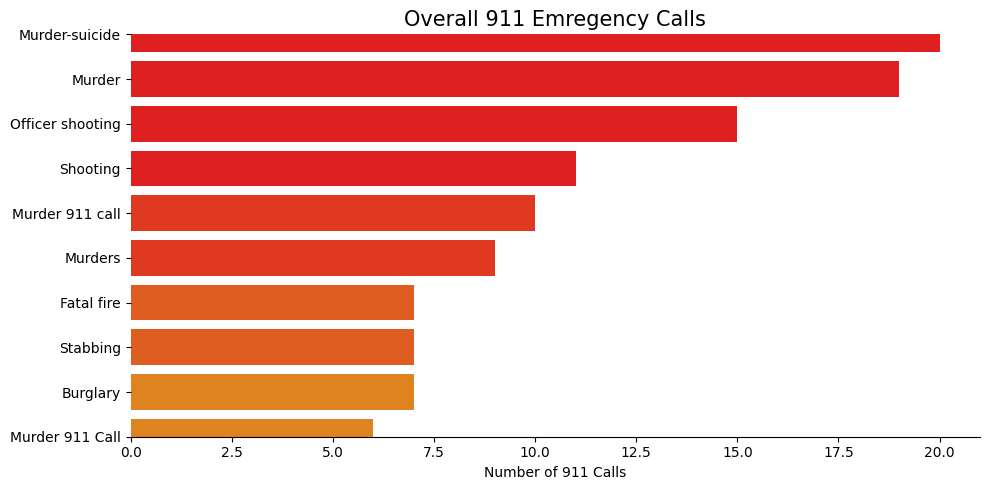

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(figsize=(10, 5))
sns.countplot(y='title', data=df, order=df['title'].value_counts().index, palette='prism')
sns.despine(bottom=False, left=True)
axes.set_ylim([9, 0])
axes.set_title('Overall 911 Emregency Calls', size=15)
axes.set(xlabel='Number of 911 Calls', ylabel='')
plt.tight_layout()

<Axes: >

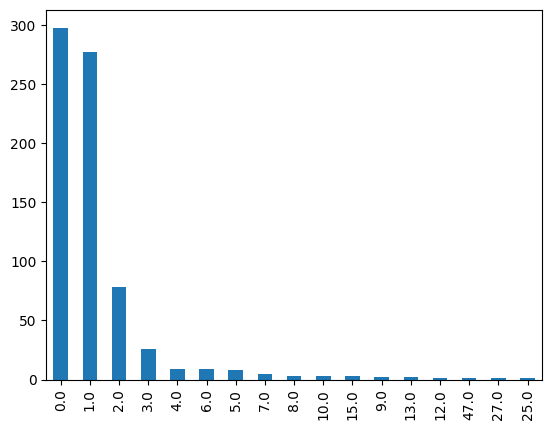

In [ ]:
df['deaths'].value_counts().plot(kind='bar')

<Axes: ylabel='false_alarm'>

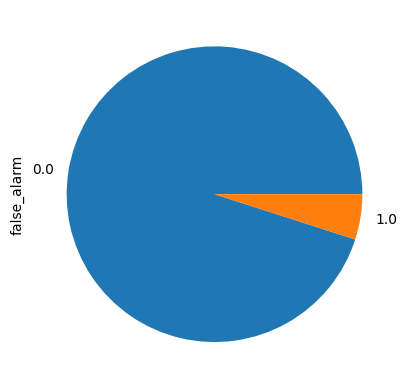

In [ ]:
df['false_alarm'].value_counts().plot(kind='pie')

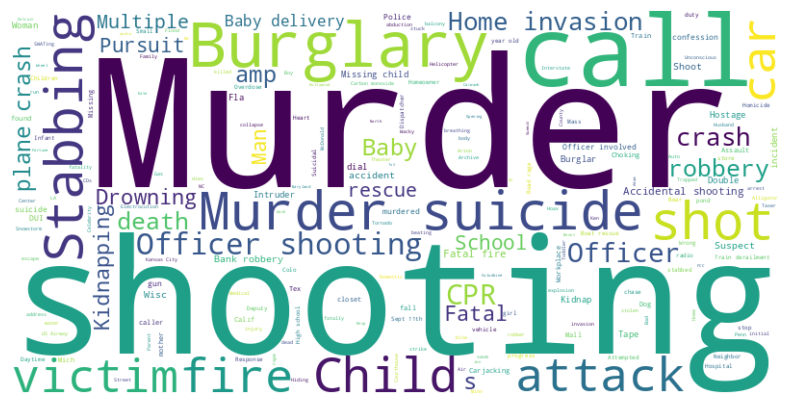

In [ ]:
from wordcloud import WordCloud
text_data = df['title'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
import zipfile
import os
zip_path = '/content/drive/MyDrive/911_recordings.zip'
extract_path = '/content/drive/MyDrive/unzipped'
os.makedirs(extract_path, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
extracted_contents = os.listdir(extract_path)
print(f"Contents of {extract_path}: {extracted_contents}")


Contents of /content/drive/MyDrive/unzipped: ['911_metadata.csv', 'call_1.mp3', 'call_10.mp3', 'call_100.mp3', 'call_101.mp3', 'call_102.mp3', 'call_103.mp3', 'call_104.mp3', 'call_105.mp3', 'call_106.mp3', 'call_107.mp3', 'call_108.mp3', 'call_109.mp3', 'call_11.mp3', 'call_110.mp3', 'call_111.mp3', 'call_112.mp3', 'call_113.mp3', 'call_114.mp3', 'call_115.mp3', 'call_116.mp3', 'call_117.mp3', 'call_118.mp3', 'call_119.mp3', 'call_12.mp3', 'call_120.mp3', 'call_121.mp3', 'call_122.mp3', 'call_123.mp3', 'call_124.mp3', 'call_125.mp3', 'call_126.mp3', 'call_127.mp3', 'call_128.mp3', 'call_129.mp3', 'call_13.mp3', 'call_130.mp3', 'call_131.mp3', 'call_132.mp3', 'call_133.mp3', 'call_134.mp3', 'call_135.mp3', 'call_136.mp3', 'call_137.mp3', 'call_138.mp3', 'call_139.mp3', 'call_140.mp3', 'call_141.mp3', 'call_142.mp3', 'call_143.mp3', 'call_144.mp3', 'call_145.mp3', 'call_146.mp3', 'call_147.mp3', 'call_148.mp3', 'call_149.mp3', 'call_15.mp3', 'call_150.mp3', 'call_151.mp3', 'call_152.mp3

**Now woring on CSV file to predict false alarm using different algorithms**


In [ ]:
#Perorming logistic regression
#LOGISTIC REGRESSION

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('/content/911_metadata.csv')
df = df[['description', 'false_alarm']]
df.dropna(subset=['description', 'false_alarm'], inplace=True)
X = df['description']
y = df['false_alarm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)



Accuracy: 0.9722222222222222
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       140
         1.0       0.00      0.00      0.00         4

    accuracy                           0.97       144
   macro avg       0.49      0.50      0.49       144
weighted avg       0.95      0.97      0.96       144



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


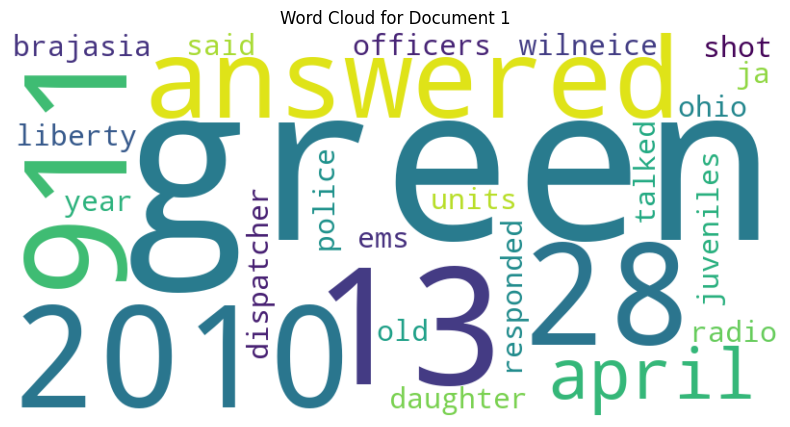

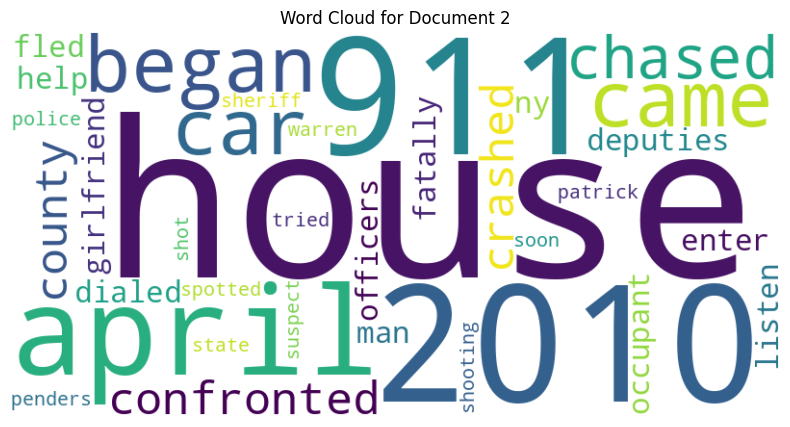

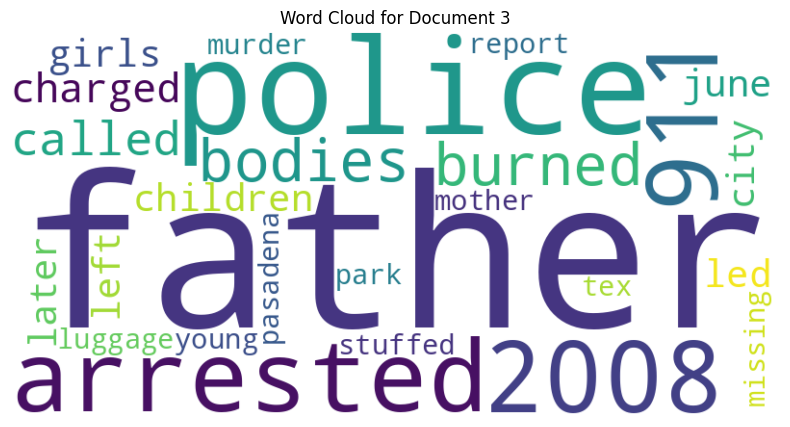

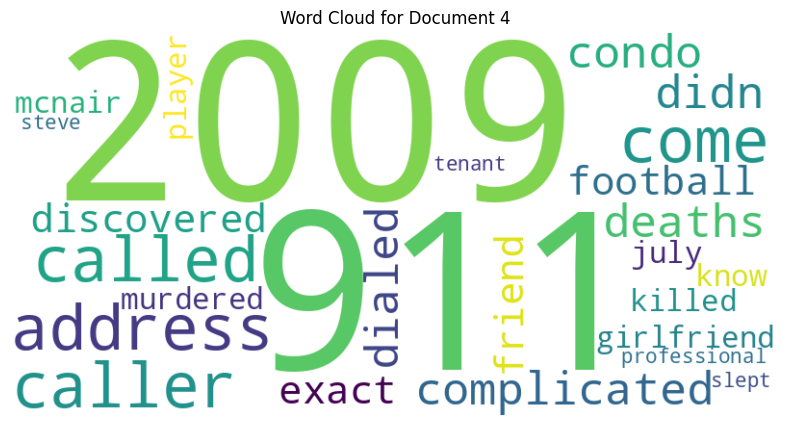

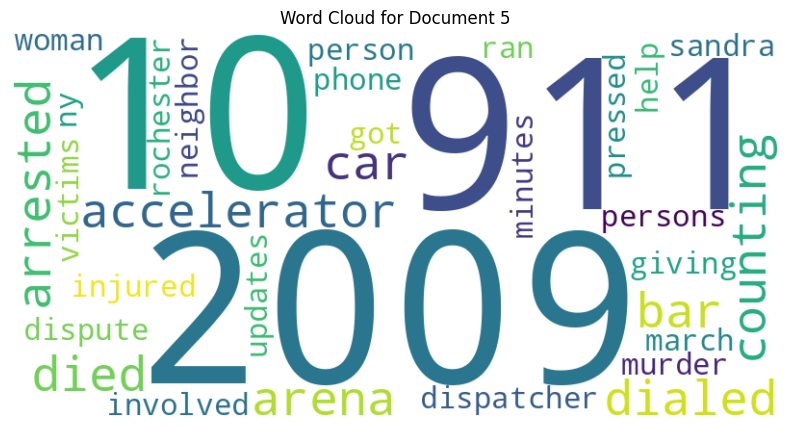


Accuracy: 0.9722222222222222
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       140
         1.0       0.00      0.00      0.00         4

    accuracy                           0.97       144
   macro avg       0.49      0.50      0.49       144
weighted avg       0.95      0.97      0.96       144



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#instead of using TFDF Vectorization, using count vectorization that creates bag of words for each row
#LOGISTIC REGRESSION

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/911_metadata.csv')
df = df[['description', 'false_alarm']]
df.dropna(subset=['description', 'false_alarm'], inplace=True)

X = df['description']
y = df['false_alarm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)
for i in range(5):
    wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate_from_frequencies(
        dict(zip(vectorizer.get_feature_names_out(), X_train_counts[i].todense().tolist()[0]))
    )

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Document {i + 1}")
    plt.show()

model = LogisticRegression()
model.fit(X_train_counts, y_train)

y_pred = model.predict(X_test_counts)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)


In [ ]:
# DECISION TREE

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/content/911_metadata.csv')
df = df[['civilian_initiated', 'deaths', 'potential_death', 'false_alarm']]

df['civilian_initiated'].fillna(0, inplace=True)
df['deaths'].fillna(0, inplace=True)
df['potential_death'].fillna(0, inplace=True)

label_encoder = LabelEncoder()
df['false_alarm'] = label_encoder.fit_transform(df['false_alarm'])

X = df.drop('deaths', axis=1)
y = df['deaths']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)


Accuracy: 0.46308724832214765
Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.35      0.45        60
         1.0       0.41      0.84      0.55        57
         2.0       0.00      0.00      0.00        15
         3.0       0.00      0.00      0.00        10
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00         1
         7.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00         1
        10.0       0.00      0.00      0.00         1
        47.0       0.00      0.00      0.00         1

    accuracy                           0.46       149
   macro avg       0.10      0.11      0.09       149
weighted avg       0.41      0.46      0.39       149



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#RANDOM FOREST

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('/content/911_metadata.csv')

df = df[['description', 'deaths']]

df.dropna(subset=['description', 'deaths'], inplace=True)
X = df['description']
y = df['deaths']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_counts, y_train)

y_pred = model.predict(X_test_counts)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)


Accuracy: 0.6180555555555556
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.77      0.75        60
         1.0       0.52      0.75      0.62        57
         2.0       0.00      0.00      0.00        20
         3.0       0.00      0.00      0.00         2
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         1
         7.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00         1

    accuracy                           0.62       144
   macro avg       0.16      0.19      0.17       144
weighted avg       0.52      0.62      0.56       144



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#GRADIENT BOOSTING MODEL

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('/content/911_metadata.csv')

df = df[['description', 'deaths']]

df.dropna(subset=['description', 'deaths'], inplace=True)

df['description_length'] = df['description'].apply(lambda x: len(x.split()))
X = df[['description', 'description_length']]
y = df['deaths']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train['description'])
X_test_tfidf = vectorizer.transform(X_test['description'])

X_train_tfidf = X_train_tfidf.multiply(X_train['description_length'].values.reshape(-1, 1))
X_test_tfidf = X_test_tfidf.multiply(X_test['description_length'].values.reshape(-1, 1))
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)


Accuracy: 0.5625
Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.73      0.72        60
         1.0       0.52      0.63      0.57        57
         2.0       0.20      0.05      0.08        20
         3.0       0.00      0.00      0.00         2
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         1
         7.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00         1
        10.0       0.00      0.00      0.00         0
        25.0       0.00      0.00      0.00         0
        27.0       0.00      0.00      0.00         0

    accuracy                           0.56       144
   macro avg       0.13      0.13      0.12       144
weighted avg       0.53      0.56      0.54       144



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
# SUPPORT VECTOR MACHINE(SVM)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('/content/911_metadata.csv')
df = df[['description', 'deaths']]
df.dropna(subset=['description', 'deaths'], inplace=True)
df['description_length'] = df['description'].apply(lambda x: len(x.split()))
X = df[['description', 'description_length']]
y = df['deaths']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train['description'])
X_test_tfidf = vectorizer.transform(X_test['description'])
X_train_tfidf = X_train_tfidf.multiply(X_train['description_length'].values.reshape(-1, 1))
X_test_tfidf = X_test_tfidf.multiply(X_test['description_length'].values.reshape(-1, 1))
model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)


Accuracy: 0.5486111111111112
Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.65      0.66        60
         1.0       0.49      0.67      0.57        57
         2.0       0.25      0.10      0.14        20
         3.0       0.00      0.00      0.00         2
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         1
         7.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00         1

    accuracy                           0.55       144
   macro avg       0.18      0.18      0.17       144
weighted avg       0.51      0.55      0.52       144



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pip install xgboost


In [ ]:
#XGBOOST MODEL

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Load the dataset
df = pd.read_csv('/content/911_metadata.csv')

df = df[['description', 'deaths']]

df.dropna(subset=['description', 'deaths'], inplace=True)

threshold = 5
df['deaths'] = (df['deaths'] > threshold).astype(int)

df['description_length'] = df['description'].apply(lambda x: len(x.split()))

X = df[['description', 'description_length']]
y = df['deaths']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train['description'])
X_test_tfidf = vectorizer.transform(X_test['description'])
X_train_tfidf = X_train_tfidf.multiply(X_train['description_length'].values.reshape(-1, 1))
X_test_tfidf = X_test_tfidf.multiply(X_test['description_length'].values.reshape(-1, 1))
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_tfidf.toarray())
X_test_scaled = scaler.transform(X_test_tfidf.toarray())
model = XGBClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)


Accuracy: 0.9722222222222222
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       141
           1       0.33      0.33      0.33         3

    accuracy                           0.97       144
   macro avg       0.66      0.66      0.66       144
weighted avg       0.97      0.97      0.97       144



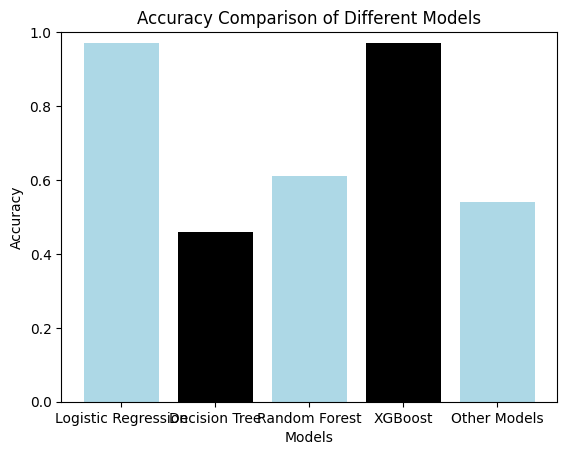

In [ ]:
#plotting the accuracy obtained
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Decision Tree', 'Random Forest','XGBoost','Other Models']


accuracy_values = [0.97, 0.46, 0.61, 0.97, 0.54]


plt.bar(models, accuracy_values, color=['lightblue', 'black', 'lightblue', 'black', 'lightblue'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)
plt.show()


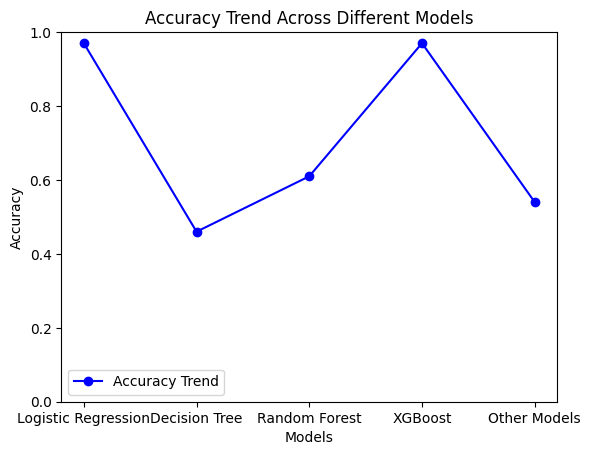

In [ ]:
import matplotlib.pyplot as plt

# List of models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'Other Models']

accuracy_values = [0.97, 0.46, 0.61, 0.97, 0.54]


plt.plot(models, accuracy_values, marker='o', linestyle='-', color='b', label='Accuracy Trend')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Trend Across Different Models')
plt.ylim(0, 1)
plt.legend()
plt.show()


In [ ]:
pip install pydub #for audio processing

In [ ]:
pip install speechrecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 27.4 MB/s eta 0:00:00


In [ ]:
import os
import glob
import pandas as pd
import speech_recognition as sr
from pydub import AudioSegment

def transcribe_audio(audio_file):
    recognizer = sr.Recognizer()
    audio = AudioSegment.from_file(audio_file)
    if audio.channels > 1:
        audio = audio.set_channels(1)
    wav_filename = audio_file.replace(os.path.splitext(audio_file)[1], ".wav")
    audio.export(wav_filename, format="wav")
    with sr.AudioFile(wav_filename) as source:
        audio_data = recognizer.record(source)
    try:
        transcript = recognizer.recognize_google(audio_data)
        return transcript
    except sr.UnknownValueError:
        return "Could not understand audio"
    except sr.RequestError as e:
        return f"Error requesting results from Google Speech Recognition service: {e}"
audio_directory = '/content/drive/MyDrive/unzipped'
audio_files = glob.glob(os.path.join(audio_directory, '*.mp3'))

filenames = []
transcripts = []

for audio_file in audio_files:
    filename = os.path.basename(audio_file)
    transcript = transcribe_audio(audio_file)

    filenames.append(filename)
    transcripts.append(transcript)
df = pd.DataFrame(list(zip(filenames, transcripts)), columns=["Filename", "Transcript"])
output_csv_file_path = 'transcripts_output.csv'
df.to_csv(output_csv_file_path, index=False)
print(f"Transcripts saved to: transcripts_output (1)")


Transcripts saved to: transcripts_output (1)


In [ ]:
#doing sentiment analaysis on the dataset

from textblob import TextBlob
df = pd.read_csv('/content/transcripts_output (1).csv')
df['Sentiment'] = df['Transcript'].apply(lambda x: TextBlob(x).sentiment.polarity)

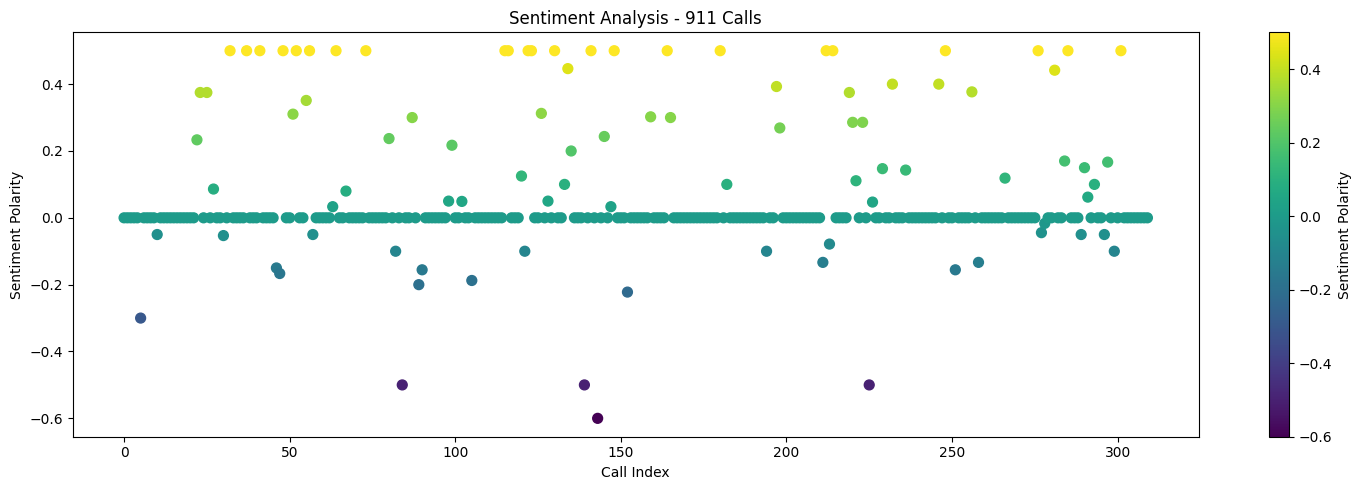

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.scatter(df.index, df['Sentiment'], c=df['Sentiment'], cmap='viridis', marker='o', s=50)
plt.title('Sentiment Analysis - 911 Calls')
plt.xlabel('Call Index')
plt.ylabel('Sentiment Polarity')
plt.colorbar(label='Sentiment Polarity')
plt.tight_layout()
plt.show()


In [ ]:
!pip install vaderSentiment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load the 911 call data
df = pd.read_csv('/content/transcripts_output (1).csv')
analyzer = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Transcript'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

print("Sentiment Analysis:")
print(df[['Filename', 'Transcript', 'Sentiment']])


Sentiment Analysis:
         Filename                                         Transcript  \
0    call_155.mp3  Gwinnett County 911 oh yes ma'am my neighbor j...   
1    call_187.mp3  911 what's the address of the emergency room I...   
2     call_65.mp3  911 what's the address of your emergency hello...   
3    call_295.mp3                911 what city is an ambulance Drive   
4    call_173.mp3                         Could not understand audio   
..            ...                                                ...   
305  call_196.mp3                         Could not understand audio   
306  call_264.mp3                         Could not understand audio   
307  call_370.mp3                         Could not understand audio   
308  call_226.mp3                                  Google hey Google   
309  call_137.mp3  County dispatch 911 can I help you hello hello...   

     Sentiment  
0      -0.4588  
1      -0.3818  
2      -0.3818  
3       0.0000  
4       0.0000  
..         ..

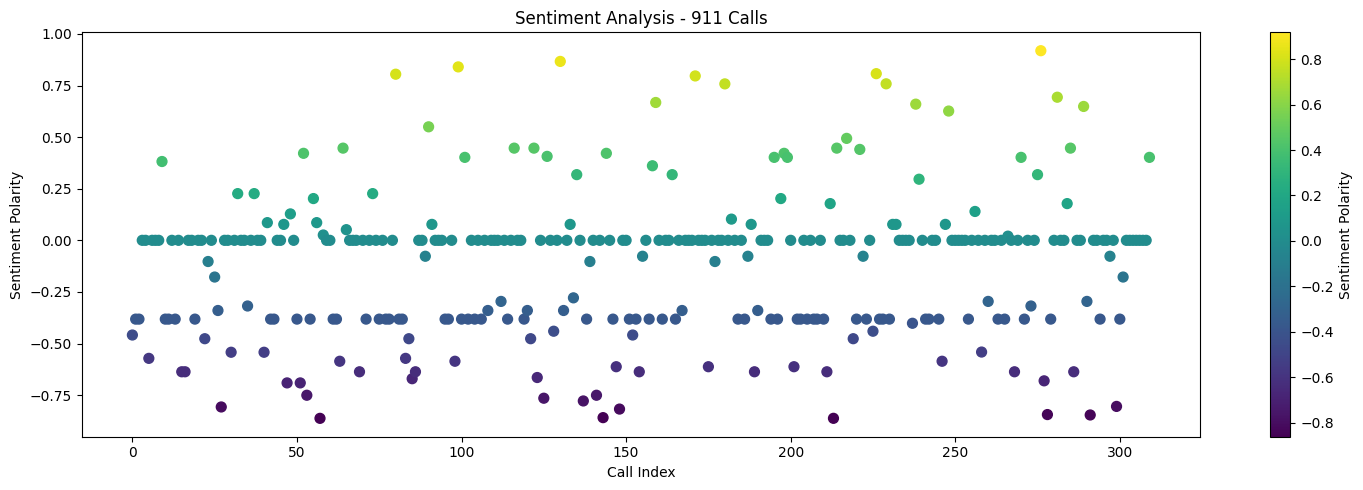

In [ ]:
import matplotlib.pyplot as plt

# Sentiment Analysis Visualization
plt.figure(figsize=(15, 5))
plt.scatter(df.index, df['Sentiment'], c=df['Sentiment'], cmap='viridis', marker='o', s=50)
plt.title('Sentiment Analysis - 911 Calls')
plt.xlabel('Call Index')
plt.ylabel('Sentiment Polarity')
plt.colorbar(label='Sentiment Polarity')
plt.tight_layout()
plt.show()


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

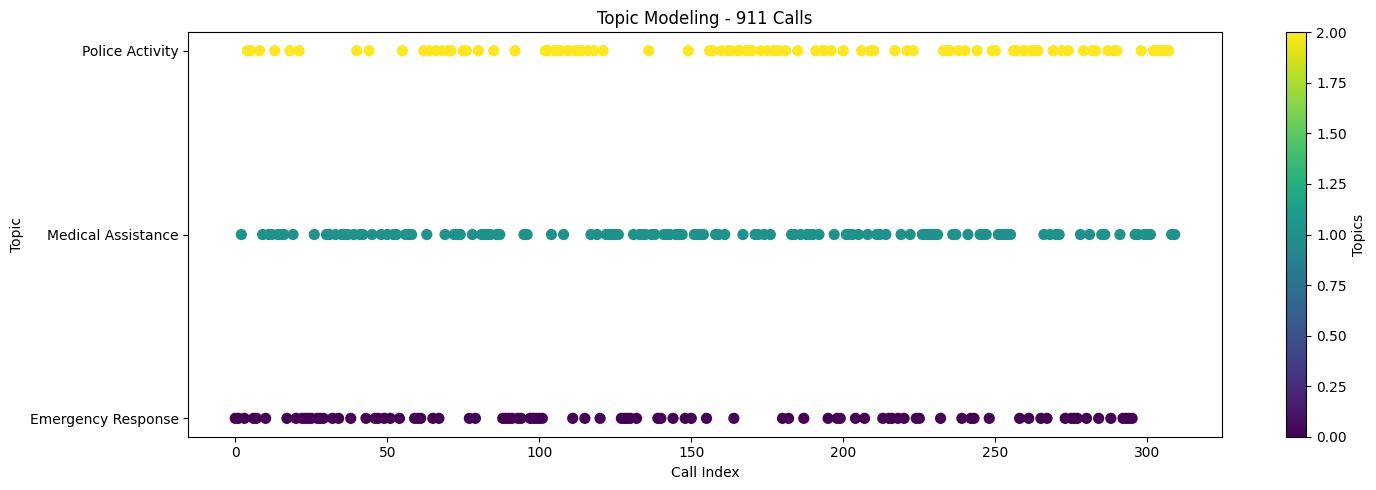

In [ ]:
#Topic modeling
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt


df = pd.read_csv('/content/transcripts_output (1).csv')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub("[^a-zA-Z]", " ", text)
    words = word_tokenize(text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

df['Processed_Transcript'] = df['Transcript'].apply(preprocess_text)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Processed_Transcript'])
lda = LatentDirichletAllocation(n_components=3, random_state=42)
topics = lda.fit_transform(X)
df['Topic'] = topics.argmax(axis=1)

topic_labels = {0: 'Emergency Response', 1: 'Medical Assistance', 2: 'Police Activity'}

df['Topic_Label'] = df['Topic'].map(topic_labels)

plt.figure(figsize=(15, 5))
plt.scatter(df.index, df['Topic'], c=df['Topic'], cmap='viridis', marker='o', s=50)
plt.title('Topic Modeling - 911 Calls')
plt.xlabel('Call Index')
plt.ylabel('Topic')
plt.yticks(range(len(topic_labels)), topic_labels.values())
plt.colorbar(label='Topics')
plt.tight_layout()
plt.show()

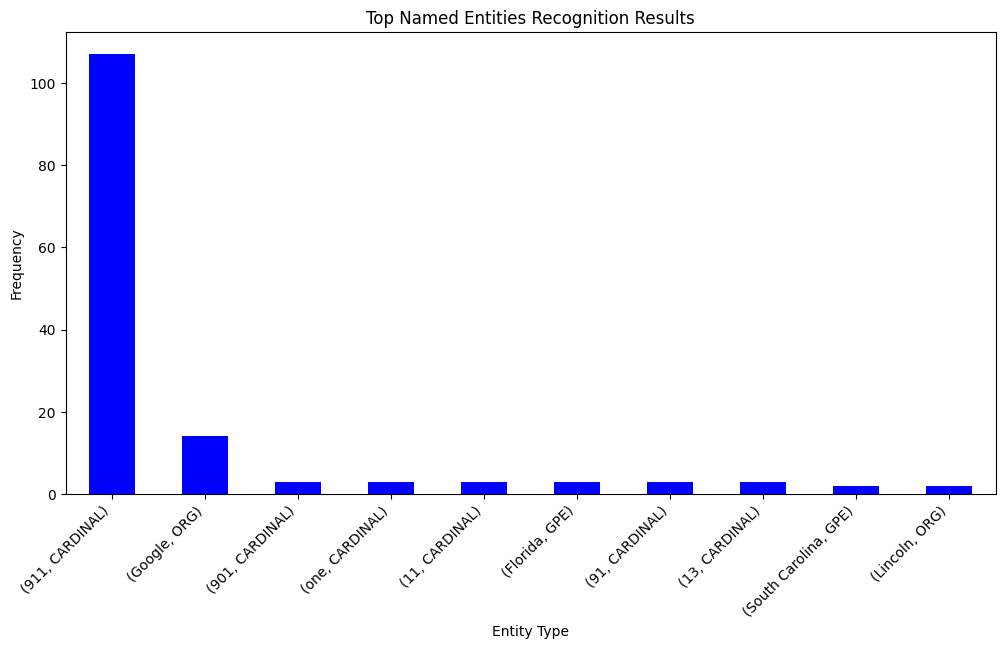

In [ ]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from collections import Counter

# Load the transcripts from a CSV file
df = pd.read_csv('/content/transcripts_output (1).csv')

nlp = spacy.load("en_core_web_sm")
def perform_ner(transcript):
    doc = nlp(transcript)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

df['ner_results'] = df['Transcript'].apply(perform_ner)

all_entities = [entity for sublist in df['ner_results'].apply(list).tolist() for entity in sublist]
entity_counts_df = pd.DataFrame({'Entity': all_entities})
top_entities = entity_counts_df['Entity'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
top_entities.plot(kind='bar', color='blue')
plt.xlabel('Entity Type')
plt.ylabel('Frequency')
plt.title('Top Named Entities Recognition Results')
plt.xticks(rotation=45, ha='right')
plt.show()


